In [1]:
# Import libraries
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
models = []
models.append({"name": "ANN", "path": "ann"})
models.append({"name": "XGB", "path": "xgb"})
models.append({"name": "Random Forest", "path": "random_forest"})
models.append({"name": "Naive Bayes", "path": "naive_bayes"})    

In [3]:
# Load ROC curves and Scores
for model in models:
    
    with open(model["path"]+"/roc.json", "r") as f:
        model["roc"] = json.load(f)
    
    with open(model["path"]+"/scores.json", "r") as f:
        model["scores"] = json.load(f)
    

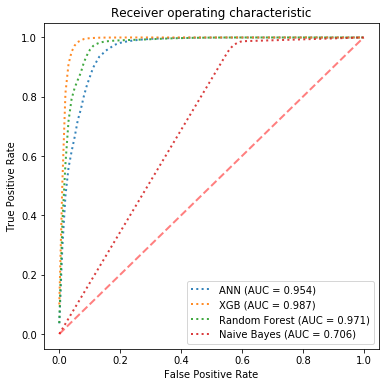

In [10]:
plt.figure(figsize=(6,6))

for model in models:
    
    plt.plot(model["roc"]["fpr"], 
             model["roc"]["tpr"], 
             linestyle=":", 
             label=r"%s (AUC = %0.3f)" % (model["name"], model["roc"]["auc"]), 
             linewidth=2, 
             alpha=.9)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.5)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc_auc.eps', format='eps')
plt.show()
plt.close()

In [13]:
keys = ["auc", "acc", "f1", "sec"]

dscores = {}
for model in models:
    d = {}
    
    for k in keys:
        d[k] = round(model["scores"]["mean"][k], 3)
        d[k+"(std)"] = round(model["scores"]["std"][k], 3)
    
    dscores[model["name"]] = d

In [14]:
scores = pd.DataFrame.from_dict(dscores, orient="index")
scores.sort_values(by=['auc'], ascending=False)

,auc,auc(std),acc,acc(std),f1,f1(std),sec,sec(std)
XGB,0.987,0.004,0.997,0.000,0.998,0.000,108.090,2.621
Random Forest,0.970,0.004,0.980,0.001,0.990,0.000,44.925,2.490
ANN,0.954,0.005,0.961,0.015,0.979,0.008,130.236,38.413
Naive Bayes,0.706,0.008,0.971,0.002,0.985,0.001,10.529,1.289


In [20]:
csv = scores.to_csv()
for row in csv.split("\n"):
    print( row.replace(",", " & ") )

 & auc & auc(std) & acc & acc(std) & f1 & f1(std) & sec & sec(std)
ANN & 0.954 & 0.005 & 0.961 & 0.015 & 0.979 & 0.008 & 130.236 & 38.413
Naive Bayes & 0.706 & 0.008 & 0.971 & 0.002 & 0.985 & 0.001 & 10.529 & 1.289
Random Forest & 0.97 & 0.004 & 0.98 & 0.001 & 0.99 & 0.0 & 44.925 & 2.49
XGB & 0.987 & 0.004 & 0.997 & 0.0 & 0.998 & 0.0 & 108.09 & 2.621

